# HW2: 3차원 좌표 변환

이번 과제에서는 다양한 3차원 변환 문제를 풀어보자.

우선 필요한 모듈을 설치한다. (이해되지 않아도 그냥 실행한다.)

In [1]:
!apt-get update
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [3,947 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,533 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-update

필요한 모듈을 불러오고, 필요한 셋팅을 한다.

In [2]:
import numpy as np # 행렬 계산을 위해 Numpy를 불러온다.
import matplotlib.pyplot as plt # 그래프 출력을 위해 Matplotlib를 불러온다.
import vtk
import pyvista as pv

pv.global_theme.jupyter_backend = 'static'
pv.global_theme.notebook = True
pv.start_xvfb()

## 좌표계 변환

아래 그림은 4개의 팔로 구성된 로봇을 보여준다. 그림에서 점 $p$의 좌표를 구해보자. 이 때, 각각의 길이는 $𝑙_1=10$, $𝑙_2=50$, $𝑙_3=30$, $𝑙_4=5$이다.

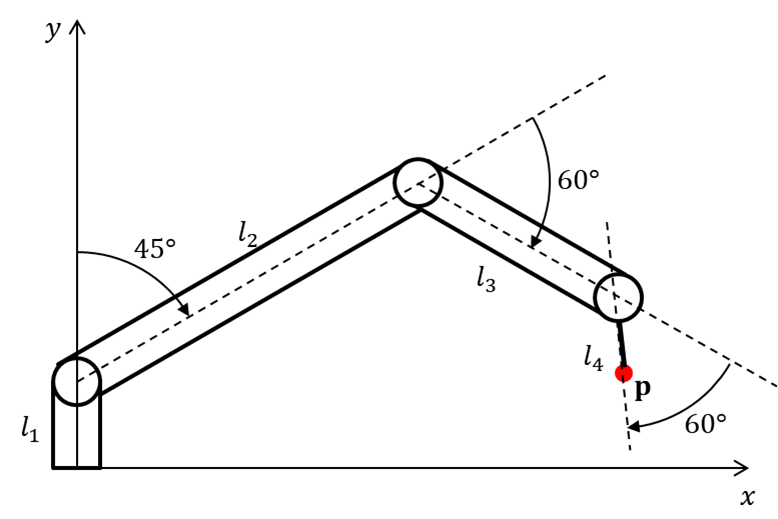


길이를 나타내는 변수를 추가하자.

In [3]:
l1 = 10
l2 = 50
l3 = 30
l4 = 5

우선 편의 함수를 몇 개 추가해 보자. 내용을 몰라도 문제 없다.

In [4]:
# 화면에 보여줄 로봇 팔의 형상을 만든다.
def create_arm(length, color):
  cube = pv.Cube(center=(length / 2, 0, 0), x_length=length, y_length=2, z_length=1)
  mapper = pv.DataSetMapper(cube)
  actor = pv.Actor(mapper=mapper)
  actor.prop.color = color
  return actor

# 화면에 보여줄 구 형상을 만든다.
def create_sphere(radius, color):
  sphere = pv.Sphere(radius)
  mapper = pv.DataSetMapper(sphere)
  actor = pv.Actor(mapper=mapper)
  actor.prop.color = color
  return actor

# 화면에 형상을 보여주는 함수이다.
def show(actors):
  plotter = pv.Plotter()

  for actor in actors:
    plotter.add_actor(actor)

  plotter.show_axes()
  plotter.add_lines(np.array([[0, 0, 0], [50, 0, 0]]), color='red', width=3)
  plotter.add_lines(np.array([[0, 0, 0], [0, 50, 0]]), color='green', width=3)
  plotter.view_xy()
  plotter.parallel_projection = True
  plotter.show()

우선 로봇 팔을 하나 추가해보자. 이름을 **arm1**이라고 하자.

In [5]:
arm1 = create_arm(l1, 'blue') # 길이가 l1이고 파란색인 arm1을 만든다.

위에서 만든 **arm1**을 화면에 표시해보자. 아래와 같이 하면 된다.

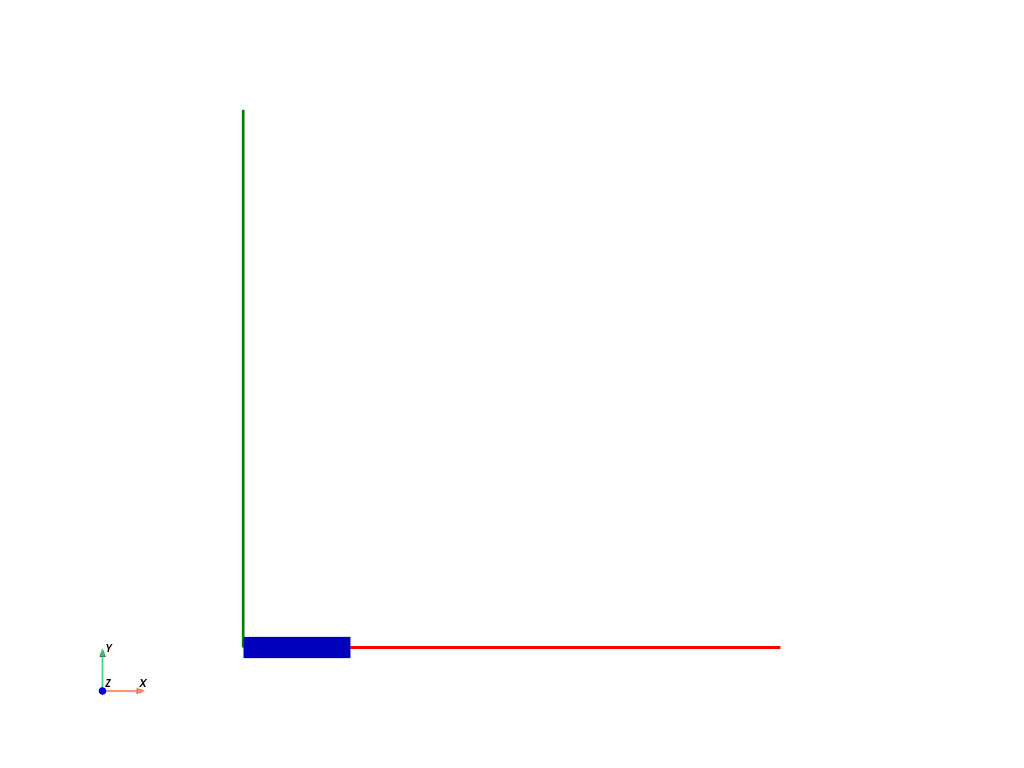

In [6]:
show([arm1])

위의 결과를 보면 기본적으로 로봇 팔의 왼쪽 끝이 원점이 놓이고 $x$-축을 따라 길이 $l1$ 만큼 연장되는 것을 볼 수 있다. 즉, 로봇 팔의 지역좌표계 원점은 로봇 팔의 왼쪽 끝이다.

이제는 변환을 이용해 로봇 팔을 다시 배치해보자. 우선 아래와 같이 두 개의 변환 행렬을 만드는 함수를 추가하자.

In [7]:
# 직선 이동 변환을 만든다.
def translate(x, y, z):
  return np.array([[1, 0, 0, x], [0, 1, 0, y], [0, 0, 1, z], [0, 0, 0, 1]])

# z-축에 대해 반시계 방향으로 회전하는 변환을 만든다.
def rotate_z(angle):
  theta = np.deg2rad(angle)
  return np.array([[np.cos(theta), -np.sin(theta), 0, 0], [np.sin(theta), np.cos(theta), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

**arm1**은 $x$-축이 아닌 $y$-축을 따라 배치되야 하므로, 현재 위치에서 90도만큼 회전시켜야 한다. 따라서 다음과 같이 해야 한다.

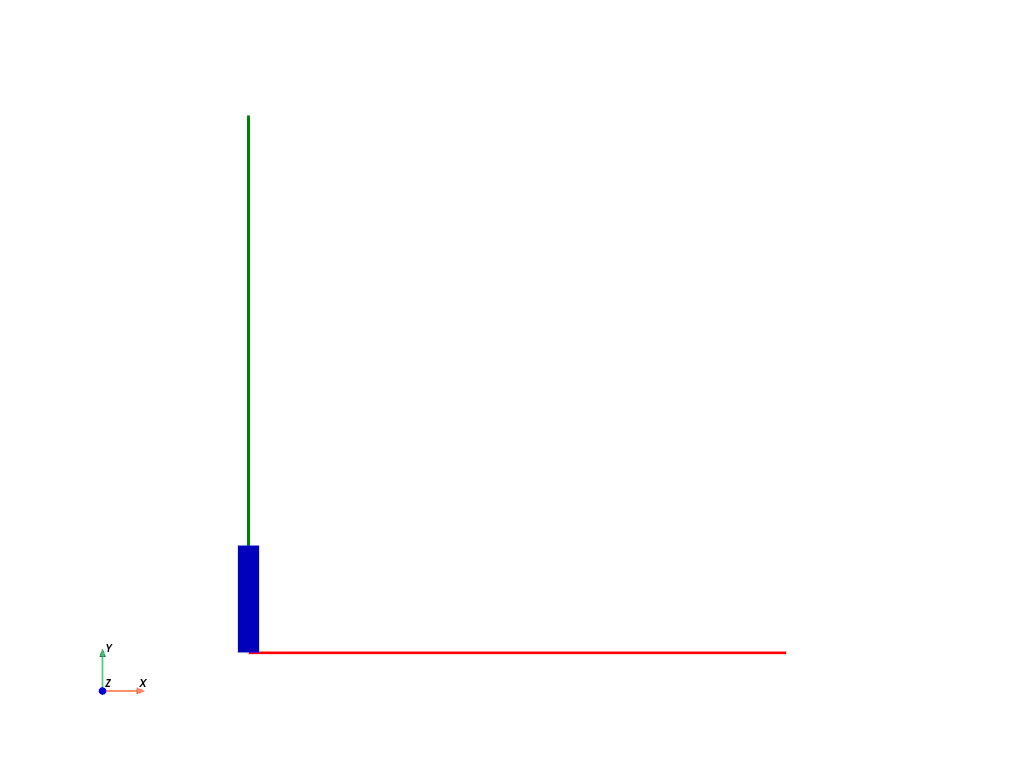

In [8]:
arm1 = create_arm(l1, 'blue') # 길이가 l1이고 파란색인 arm1을 만든다.
transform1 = rotate_z(90) # 90도 회전시킨다.
arm1.user_matrix = transform1 # arm1에 회전 변환을 적용한다.

show([arm1])

그 다음으로 두 번째 로봇 팔을 추가해보자. 이름을 **arm2** 라고 하자.

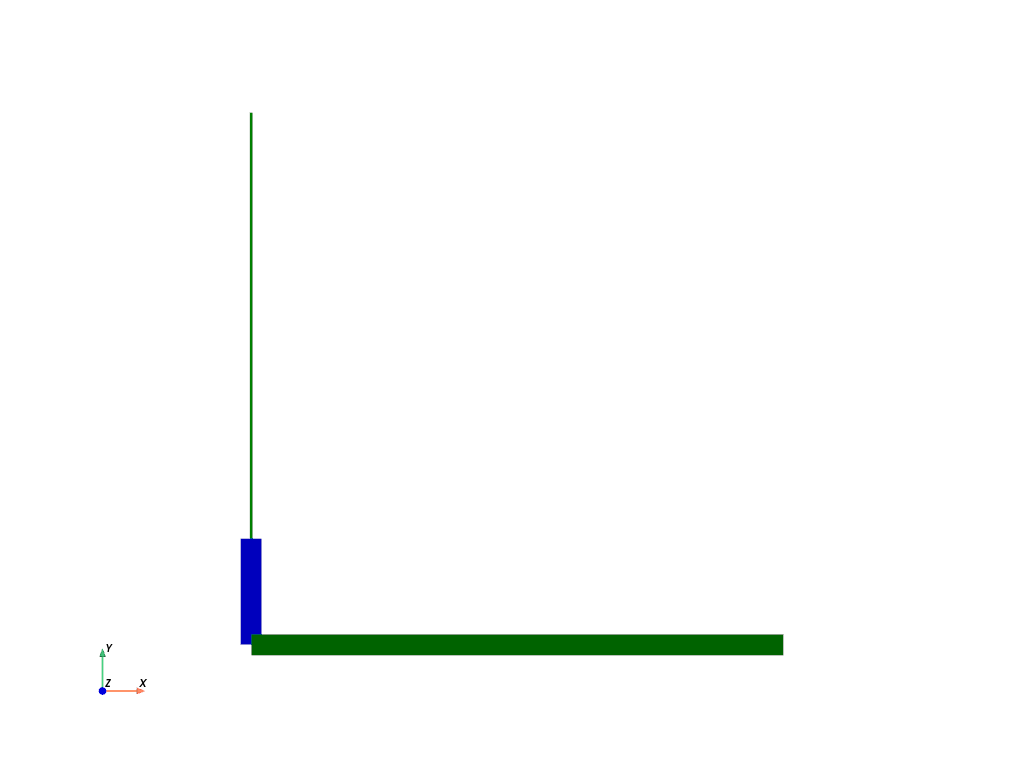

In [9]:
arm2 = create_arm(l2, 'green') # arm2를 만든다.
show([arm1, arm2])

**arm2**도 위치를 조정해야 한다. 우선 **arm2**의 좌표계를 **arm1**의 좌표계와 동일하게 맞추자.

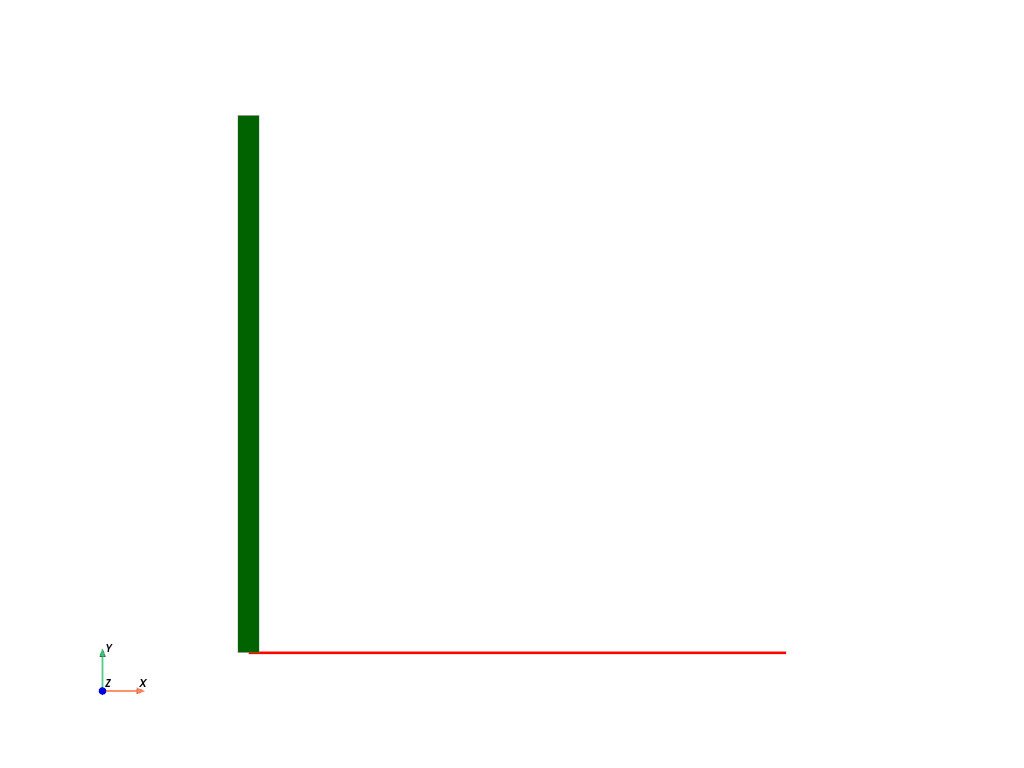

In [10]:
arm2 = create_arm(l2, 'green') # arm2를 만든다.
transform2 = transform1 # arm1에 적용한 transform1을 적용한다.
arm2.user_matrix = transform2
show([arm1, arm2])

그리고 **arm1** 또는 **arm2**의 현재 지역좌표계를 기준으로 $x$-축 방향으로 $l1$ 만큼 이동시킨다. (이동 방향이 $y$-축이 아닌 $x$-축인지 이유를 생각해 보자.)

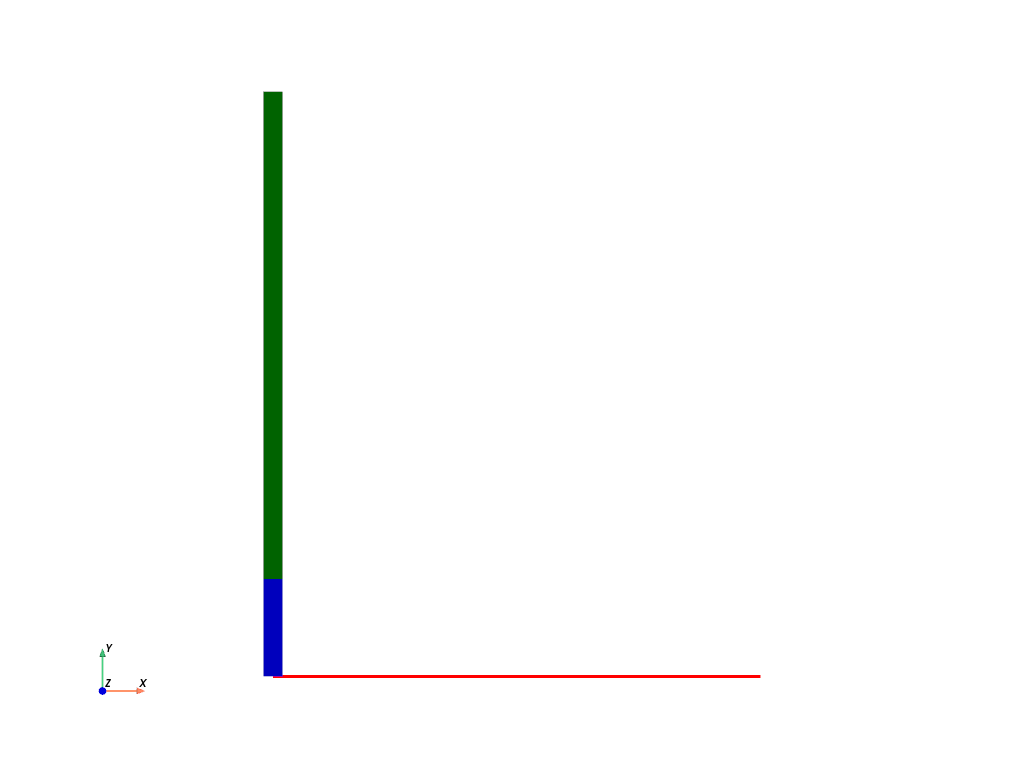

In [11]:
arm2 = create_arm(l2, 'green') # arm2를 만든다.
transform2 = transform1.dot(translate(l1, 0, 0)) # transform1을 적용하고 x-축 방향으로 l1만큼 이동시킨다.
arm2.user_matrix = transform2
show([arm1, arm2])

그리고 **arm2**의 지역죄표계를 기준으로 반시계 방향으로 45도, 즉 -45도 회전시킨다.

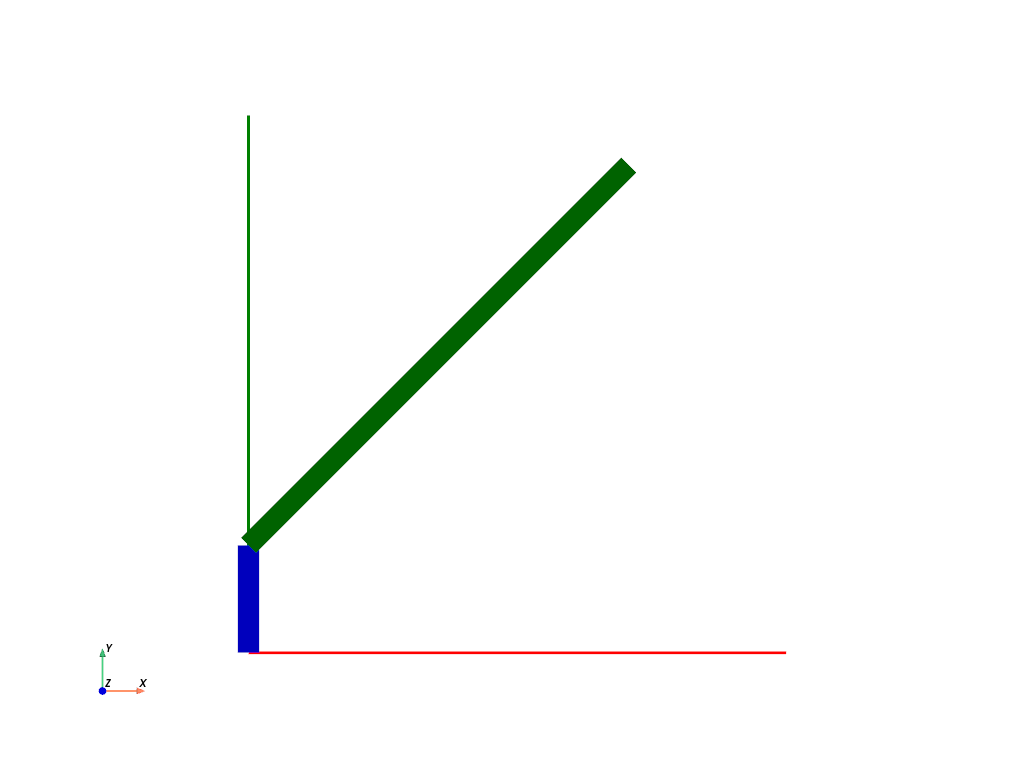

In [12]:
arm2 = create_arm(l2, 'green') # arm2를 만든다.
transform2 = transform1.dot(translate(l1, 0, 0)).dot(rotate_z(-45)) # transform1을 적용하고 x-축 방향으로 l1만큼 이동시키고, -45도 회전시킨다.
arm2.user_matrix = transform2
show([arm1, arm2])

앞의 내용을 참고하여 아래 코드에 4개의 로봇 팔을 배치하는 코드를 추가해보자.

**지시: 아래에 로봇 팔과 점 $p$를 배치하는 코드를 추가하시오. 아래 그림과 같이 보여야 한다.**

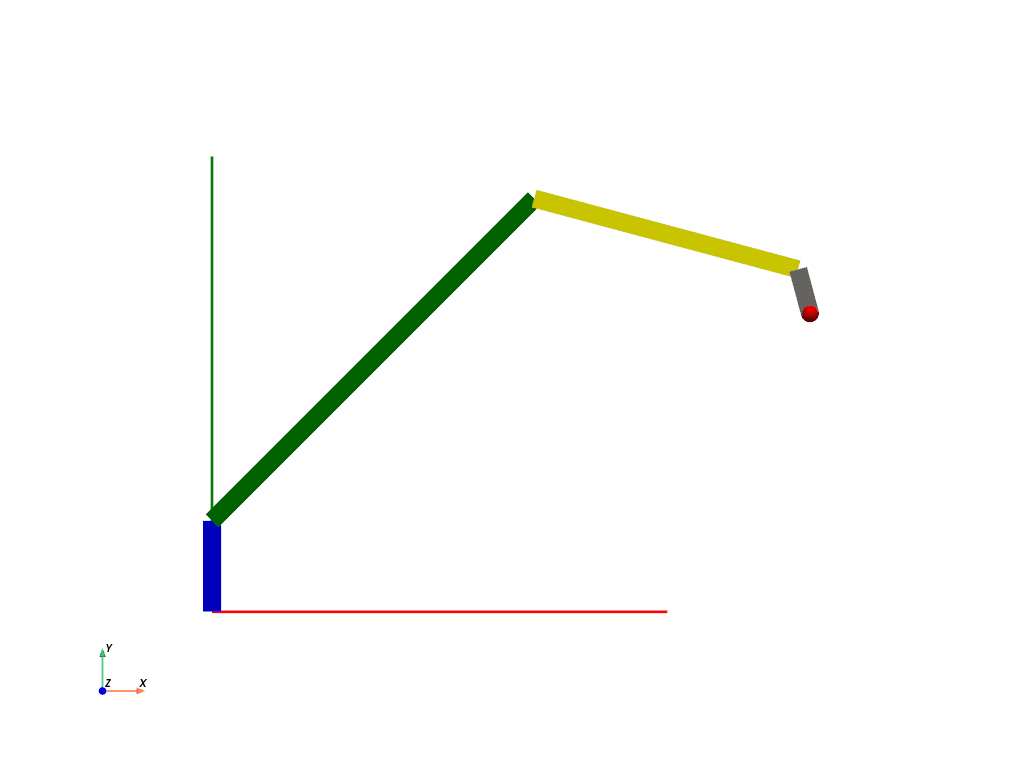

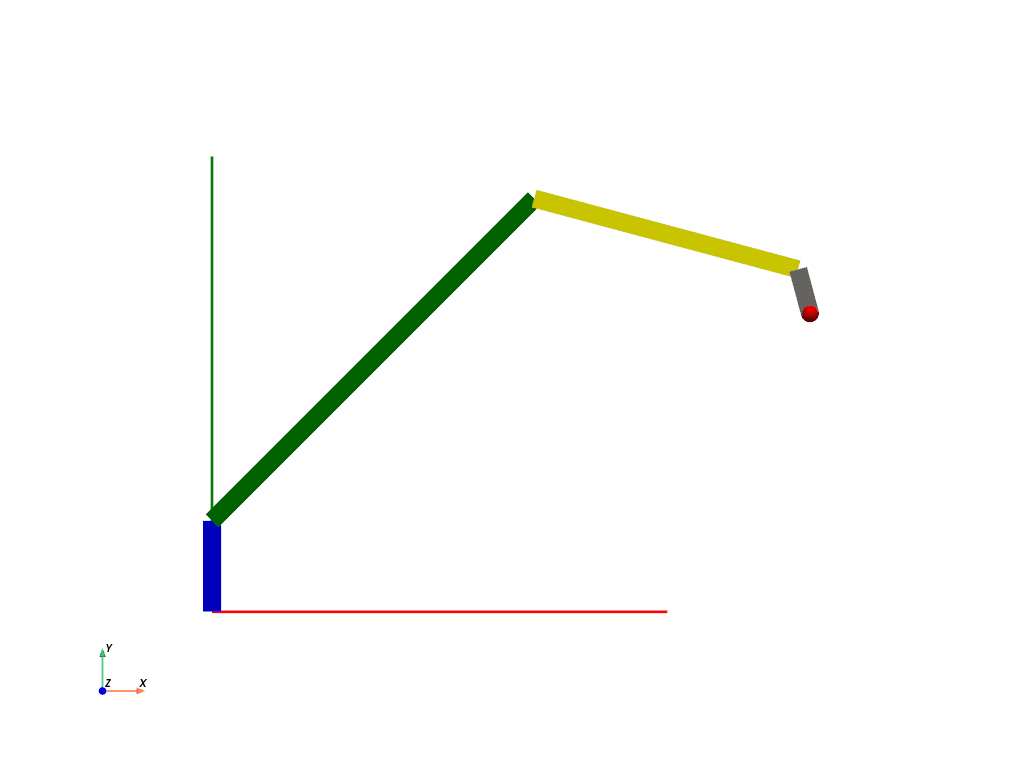

In [13]:
# 앞에 추가한 내용과 동일
arm1 = create_arm(l1, 'blue')
transform1 = rotate_z(90)
arm1.user_matrix = transform1

# 앞에 추가한 내용과 동일
arm2 = create_arm(l2, 'green')
transform2 = transform1.dot(translate(l1, 0, 0)).dot(rotate_z(-45))
arm2.user_matrix = transform2

# arm3 추가
arm3 = create_arm(l3, 'yellow')
## arm3를 배치하기 위해 아래 코드를 적절히 수정하시오.
#### 코드 시작 ####
transform3 = transform2.dot(translate(l2, 0, 0)).dot(rotate_z(-60))
#### 코드 종료 ####
arm3.user_matrix = transform3

# arm4 추가
arm4 = create_arm(l4, 'gray')
## arm4를 배치하기 위해 아래 코드를 적절히 수정하시오.
#### 코드 시작 ####
transform4 = transform3.dot(translate(l3, 0, 0)).dot(rotate_z(-60))
#### 코드 종료 ####
arm4.user_matrix = transform4

# 점 p 추가
p = create_sphere(1, 'red')
## 점 p를 배치하기 위해 아래 코드를 적절히 수정하시오.
#### 코드 시작 ####
transform_p = transform4.dot(translate(l4, 0, 0))
#### 코드 종료 ####
p.user_matrix = transform_p

show([arm1, arm2, arm3, arm4, p])

점 $p$는 자신의 지역좌표계를 기준으로 원점 (0, 0, 0)에 있기 때문에, 앞에서 구한 변환 행렬 **transform_p**에 원점(동차 좌표계)을 적용하면 계산할 수 있다.

**지시: 전역좌표계를 기준으로 점 p의 좌표를 계산하시오.**

In [14]:
## 점 p의 전역좌표를 계산하기 위해 아래 코드를 적절히 수정하시오.
#### 코드 시작 ####
global_p = transform_p.dot(np.array([0, 0, 0, 1]))
#### 코드 종료 ####

앞에서 계산한 **global_p**의 값이 맞는지 확인하기 위해 아래 코드를 실행해 보시오.

In [15]:
assert abs(global_p[0] - 65.6272) < 0.0001
assert abs(global_p[1] - 32.7611) < 0.0001
assert abs(global_p[2] - 0) < 0.0001
assert abs(global_p[3] - 1) < 0.0001

print("성공!!!")
print("동차 좌표계에서: ", global_p)

성공!!!
동차 좌표계에서:  [65.62720907 32.76113857  0.          1.        ]


## 쿼터니언(quaternion)

이번에는 쿼터니언을 이용해 회전을 구현해보자.

이번 과제에서는 쿼터니언을 1개의 스칼라와 크기가 3인 벡터로 표현한다. 즉, $q = q_0 + \mathbf{q}$는 다음과 같이 표현한다.

$$
q = (q_0, \mathbf{q})
$$

그러면 쿼터니언 $q$의 스칼라 부분은 $q_0$이고, 벡터 부분은 $\mathbf{q}=(q_1, q_2, q_3)$가 된다.

두 쿼터니언 $q$와 $p$의 곱은 다음과 같이 정의한다.

$$
pq = (p_0+p)(q_0+q) = p_0 q_0 - \mathbf{p}\cdot\mathbf{q} + p_0\mathbf{q} + q_0\mathbf{p} + \mathbf{p}\times\mathbf{q}
$$

**지시: 두 쿼터니언 $p$와 $q$의 곱을 계산하는 함수 multiply를 완성하시오.**

In [21]:
# p와 q의 곱을 계산한다.
# 이때, p = (p0, pv), q = (q0, qv)이고
# pv와 qv는 크기가 3인 numpy array이다.
def multiply(p, q):
  p0 = p[0]
  q0 = q[0]
  pv = p[1]
  qv = q[1]
  ## 점 p의 전역좌표를 계산하기 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  pq0 = p0 * q0 - pv.dot(qv)
  pqv = p0 * qv + q0 * pv + np.cross(pv, qv)
  #### 코드 종료 ####
  return (pq0, pqv)

아래 코드를 실행해 함수 **multiply**를 테스트한다.

In [24]:
p = (3, np.array([1, -2, 1])) # p = 3 - i - 2j + k = (3, (-1, -2, 1))
q = (2, np.array([-1, 2, 3])) # q = 2 - i + 2j +3k = (2, (-1, 2, 3))

pq = multiply(p, q)

assert abs(pq[0] - 8) < 0.0001
assert abs(pq[1][0] + 9) < 0.0001
assert abs(pq[1][1] + 2) < 0.0001
assert abs(pq[1][2] - 11) < 0.0001

print("성공!!!")
print(pq)

성공!!!
(8, array([-9, -2, 11]))


쿼터니언을 이용해 한 점 $v$를 회전시켜보자. 회전은 다음과 같이 계산할 수 있다.

$$
L_q(v) = qvq^*
$$

여기서, $q$는 회전축 $\mathbf{u}$(단위벡터)와 회전각도 $\theta$를 이용해 다음과 같이 표현된다.

$$
q = q_0 + \mathbf{q} = cos{\theta \over 2} + \mathbf{u} cos{\theta \over 2}
$$

위의 식을 이용해 한 점 $v$를 벡터 $\mathbf{u}$를 회전축으로 하여 $\theta$ 만큼 회전시키는 함수를 구현해보자.

**지시: 아래의 rotate_quaternion 함수를 완성하시오.**

In [34]:
# 회전축 u에 대해 벡터 v를 theta도 만큼 회전시킨다.
def rotate_quaternion(u, theta, v):
  ## 점 p의 전역좌표를 계산하기 위해 아래 코드를 적절히 수정하시오.
  #### 코드 시작 ####
  u /= np.sqrt(u.dot(u)) # 단위 벡터를 계산한다.
  theta = np.deg2rad(theta) # 도를 라디안으로 변환

  q0 = np.cos(theta/2)
  qv = u * np.sin(theta/2)
  q = (q0, qv)
  qc = (q0, -qv)
  v = (0, v)
  vr = multiply(multiply(q, v), qc)
  #### 코드 종료 ####
  return vr

테스트를 위해 아래 코드를 실행해 보시오.

In [40]:
u = np.array([1., 1., 1.])
theta = 120
v = np.array([1., 0., 0.])

vr = rotate_quaternion(u, theta, v)
vr = vr[1] # 벡터 부분만 가져온다.

assert abs(vr[0]) < 0.0001
assert abs(vr[1] - 1) < 0.0001
assert abs(vr[2]) < 0.0001

print("성공!!!")
print(vr)

성공!!!
[ 1.11022302e-16  1.00000000e+00 -1.11022302e-16]


눈으로 확인해 보기 위해 아래 코드를 실행해 보자.

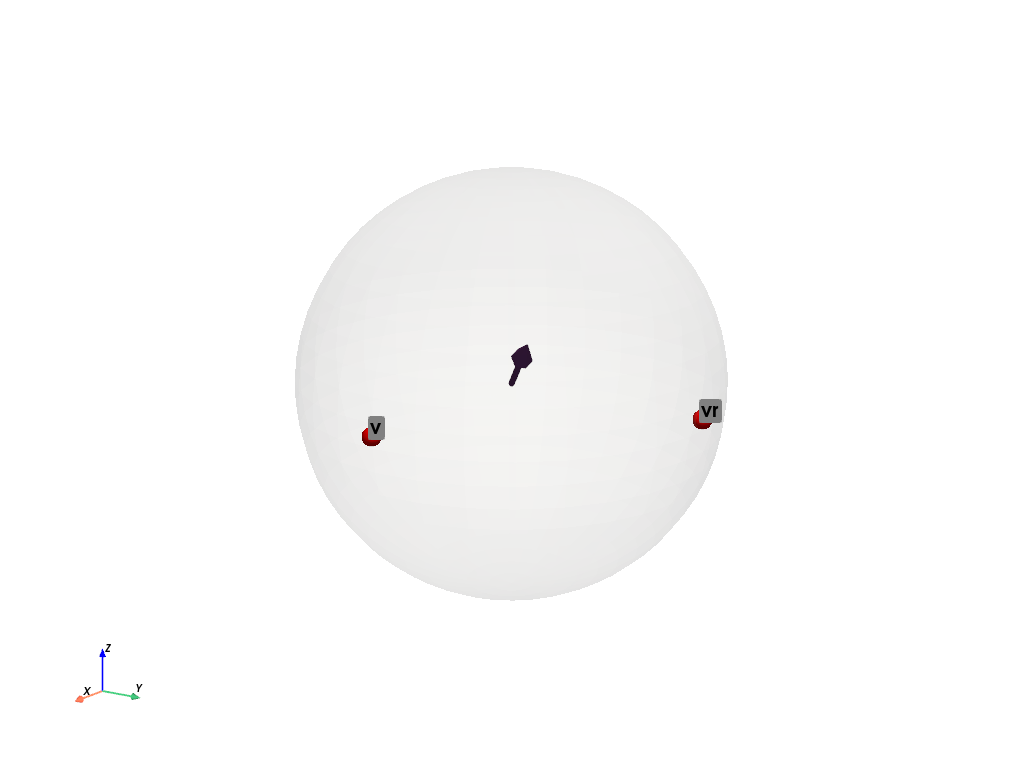

In [43]:
plotter = pv.Plotter()
unit_sphere = pv.Sphere(1)
plotter.add_mesh(unit_sphere, color='white', opacity=0.1)
plotter.add_arrows(cent=np.array([[0, 0, 0]]), direction=np.array([u]), mag=0.5, show_scalar_bar=False)
plotter.add_point_labels(points=np.array([v, vr]), labels=['v', 'vr'], point_color='red', point_size=20, render_points_as_spheres=True, font_size=20, always_visible=True)
plotter.camera.azimuth = -10
plotter.camera.elevation = -20
plotter.show_axes()
plotter.show()

이번 과제는 여기까지 입니다. 수고하셨습니다.